<a href="https://colab.research.google.com/github/AntonioGarciaData/prueba_codigos_PEA_ML_DL/blob/main/Supervised_models%20/Decission_Tree/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a> 
10. <a href="#item34">RandomSearch</a> 
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn 
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
pddf.shape

(76020, 371)

In [4]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

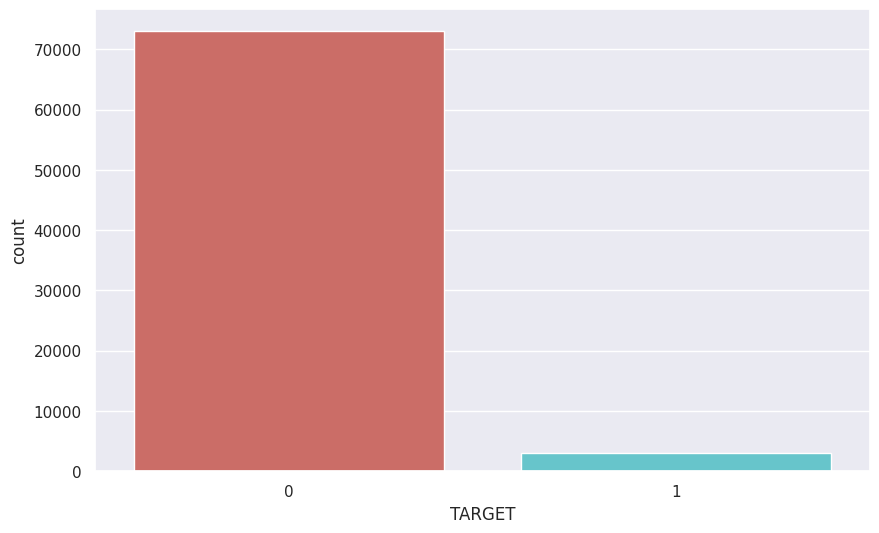

In [5]:
# Analizando el target 
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [6]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [7]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['ind_var8_0',
 'imp_op_var40_efect_ult1',
 'num_var22_hace3',
 'ind_var6_0',
 'ind_var5_0',
 'imp_aport_var17_hace3',
 'num_var31',
 'num_op_var39_comer_ult1',
 'num_compra_var44_ult1',
 'imp_trasp_var17_in_hace3',
 'saldo_var17',
 'imp_op_var40_efect_ult3',
 'num_var45_hace3',
 'num_op_var39_ult1',
 'num_var45_ult3',
 'saldo_medio_var17_ult1',
 'num_var22_hace2',
 'saldo_medio_var8_ult3',
 'saldo_var25',
 'num_trasp_var33_out_ult1',
 'delta_num_compra_var44_1y3',
 'ind_var46',
 'saldo_var5',
 'delta_num_trasp_var33_out_1y3',
 'num_var7_emit_ult1',
 'ind_var24_0',
 'num_aport_var13_hace3',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var44_ult3',
 'imp_reemb_var33_hace3',
 'ind_var43_recib_ult1',
 'delta_imp_amort_var18_1y3',
 'num_trasp_var17_in_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_var43_emit_ult1',
 'num_var41_0',
 'num_var33_0',
 'ind_var33_0',
 'num_trasp_var33_in_hace3',
 'saldo_var13_medio',
 'ind_var13_medio',
 'num_var8_0',
 'ind_var37',
 'saldo_medio_var5_ult1',
 'num_

In [9]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [10]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [11]:
y_train.mean()

0.039576051415041155

In [12]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [13]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [14]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

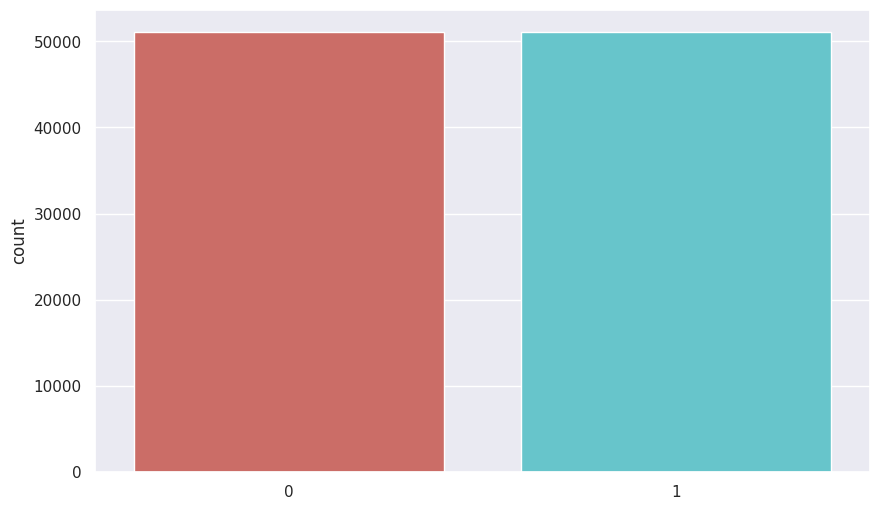

In [15]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [16]:
# Cargar librerías 

from sklearn.tree import DecisionTreeClassifier


In [17]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5, 
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)
    
dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [18]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [19]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [20]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [21]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [22]:
y_train.shape[0] - y_train.sum()

51108

In [23]:
y_train.sum()

2106

In [24]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [25]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5, 
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)
    
dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [26]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [27]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.803175
1,Gini,0.640132,0.606351
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [28]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5, 
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)
    
# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.803175,0.823127,0.804982
1,Gini,0.601789,0.598221,0.640132,0.606351,0.646253,0.609964
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [30]:
X_train['TARGET'] = y_train

<Axes: >

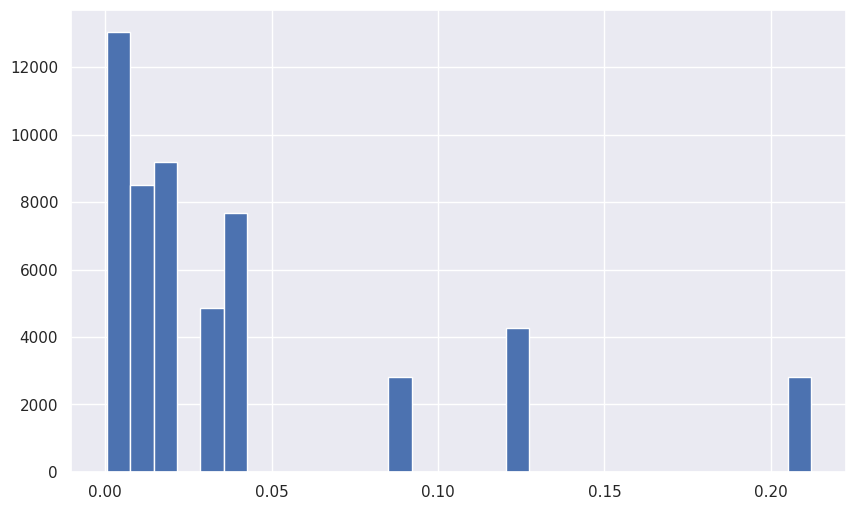

In [31]:
X_train.probability_unb.hist(bins = 30)

In [32]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

<Axes: >

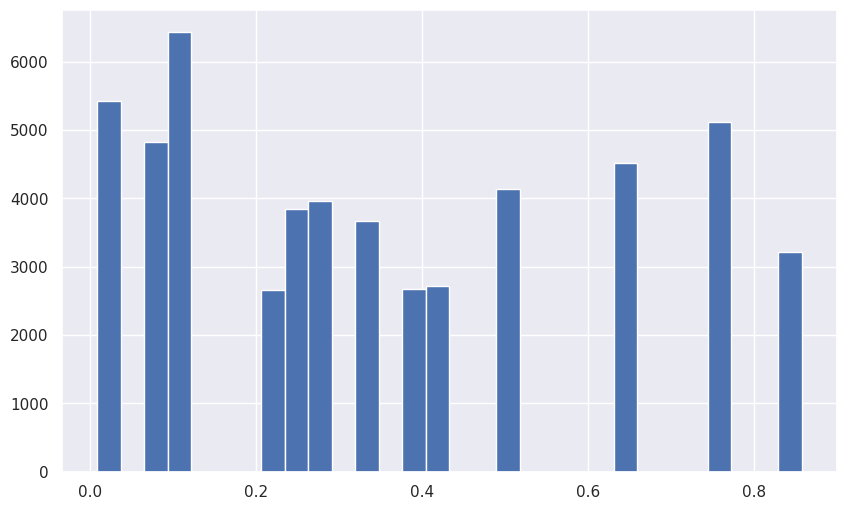

In [33]:
X_train.probability.hist(bins = 30)

In [34]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>
 
 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test. 



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.
 



 
Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [35]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [36]:
# Definiendo los parámetros a probar

parameters = {'max_depth': np.linspace(2, 15, 14),
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [37]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [38]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


ValueError: ignored

In [ ]:
GridSearch.best_params_

In [39]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [40]:

# Calling Method 
plot_search_results(GridSearch)


AttributeError: ignored

In [41]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6, 
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)
    
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [42]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [43]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [44]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt          

,metric,dTree_train,dTree_test
0,AUC,0.808715,0.798743
1,Gini,0.617431,0.597487
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [45]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808715,0.798743
1,Gini,0.601789,0.598221,0.617431,0.597487
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [46]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [47]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
200,ind_var30,0.489990
258,var15,0.279996
262,saldo_var30,0.068183
127,imp_op_var41_efect_ult3,0.044417
71,var38,0.039043
96,saldo_var37,0.021746
361,ind_var37_cte,0.018887
69,num_var22_ult3,0.015889
267,num_var22_ult1,0.006266
253,num_var4,0.005826


# Random Forest

In [48]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [49]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [50]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 6, 
                             min_samples_leaf = 0.01,
                             class_weight = {0: 1, 1: 24.267},
                             oob_score = True,
                             verbose = 1, 
                             n_jobs = 4,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se 
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [51]:
import multiprocessing
multiprocessing.cpu_count()

4

In [52]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


----4.632899045944214 seconds ---


In [53]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
258,var15,0.122002
262,saldo_var30,0.083540
207,num_var35,0.059246
162,num_var30,0.058626
180,saldo_var42,0.058425
...,...,...
352,ind_var10_ult1,0.000038
34,imp_var43_emit_ult1,0.000024
68,num_var5_0,0.000023
120,num_var37_med_ult2,0.000011


In [54]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [55]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left') 
metricsRes        

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.802901,0.800285
1,Gini,0.601789,0.598221,0.605801,0.600570
2,Accuracy,0.783309,0.788389,0.711862,0.712225
3,Precision,0.112491,0.115143,0.090774,0.090909
4,Recall,0.649573,0.650776,0.696581,0.697339
5,F1-score,0.191771,0.195667,0.160618,0.160849


# AdaBoost

In [56]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [57]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [58]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [59]:
start_time = time.time()
ada_clf.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----44.90681838989258 seconds ---


In [60]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
71,var38,0.075
258,var15,0.065
262,saldo_var30,0.050
109,saldo_medio_var5_hace3,0.050
166,imp_op_var39_comer_ult1,0.040
...,...,...
123,saldo_medio_var13_corto_ult1,0.005
176,imp_op_var41_efect_ult1,0.005
303,imp_op_var39_efect_ult3,0.005
247,imp_op_var39_comer_ult3,0.005


In [61]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [62]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left') 
metricsRes        

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.800894,0.799110,0.802901,0.800285,0.858622,0.821658
1,Gini,0.601789,0.598221,0.605801,0.600570,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.711862,0.712225,0.960631,0.960405
3,Precision,0.112491,0.115143,0.090774,0.090909,0.720000,0.444444
4,Recall,0.649573,0.650776,0.696581,0.697339,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.160618,0.160849,0.016893,0.008782


In [63]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

In [64]:
evaluate_ks_and_roc_auc(y_train, X_train.probability)

KS: 0.5658 (p-value: 0.000e+00)
ROC AUC: 0.8586


(0.5658434727465017, 0.858621819864026)

In [65]:
evaluate_ks_and_roc_auc(y_test, X_test.probability)

KS: 0.5142 (p-value: 3.555e-213)
ROC AUC: 0.8217


(0.5142485289568348, 0.8216583622710024)

# XGBoost

In [66]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test, 
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


In [67]:
# Cargando librerías

import numpy as np
import xgboost as xgb


In [68]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [69]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 8,
         'learning_rate': 0.05,
         'min_data_leaf' : 0.05,
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc'
num_round = 300         
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [70]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist, 
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[20:43:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.84292	watchlist-auc:0.80076
[1]	train-auc:0.84437	watchlist-auc:0.80093
[2]	train-auc:0.84804	watchlist-auc:0.80307
[3]	train-auc:0.84907	watchlist-auc:0.80407
[4]	train-auc:0.85054	watchlist-auc:0.80352
[5]	train-auc:0.85463	watchlist-auc:0.80374
[6]	train-auc:0.85564	watchlist-auc:0.80312
[7]	train-auc:0.85800	watchlist-auc:0.80401
[8]	train-auc:0.86128	watchlist-auc:0.80553
[9]	train-auc:0.86222	watchlist-auc:0.80576
[10]	train-auc:0.86409	watchlist-auc:0.80634
[11]	train-auc:0.86528	watchlist-auc:0.80605
[12]	train-auc:0.86661	watchlist-auc:0.80642
[13]	train-auc:0.86769	watchlist-auc:0.80696
[14]	train-auc:0.86938	watchlist-auc:0.80746
[15]	train-auc:0.86993	watchlist-auc:0.80792
[16]	train-auc:0.87177	watchlist-auc:0.80723
[17]	train-auc:0.87291	watchlist-auc:0.81040
[18]	train-auc:0.87407	watchlist-auc:0.81077
[19]	train-auc:0.87509	watchlist-auc:0.81120
[20]	tr

<b>Variables del Modelo</b>

In [71]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'ind_var8_0': 15.227507591247559,
 'imp_op_var40_efect_ult1': 15.830788612365723,
 'num_var22_hace3': 64.40812683105469,
 'ind_var5_0': 1.8324702978134155,
 'num_var31': 0.28336966037750244,
 'num_op_var39_comer_ult1': 40.097862243652344,
 'saldo_var17': 5.726909637451172,
 'imp_op_var40_efect_ult3': 1.3405892848968506,
 'num_var45_hace3': 68.04540252685547,
 'num_op_var39_ult1': 14.744752883911133,
 'num_var45_ult3': 78.13323211669922,
 'num_var22_hace2': 58.45054244995117,
 'saldo_medio_var8_ult3': 36.389095306396484,
 'saldo_var25': 10.731063842773438,
 'saldo_var5': 67.97837829589844,
 'ind_var24_0': 3.856999397277832,
 'num_aport_var13_hace3': 0.4537043571472168,
 'ind_var43_recib_ult1': 0.5896029472351074,
 'imp_var43_emit_ult1': 33.66438293457031,
 'num_var41_0': 9.586019515991211,
 'ind_var37': 11.397041320800781,
 'saldo_medio_var5_ult1': 42.35591125488281,
 'ind_var26_cte': 38.97875213623047,
 'ind_var14': 0.43536376953125,
 'ind_var32_cte': 1.810150146484375,
 'num_var5_0':

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

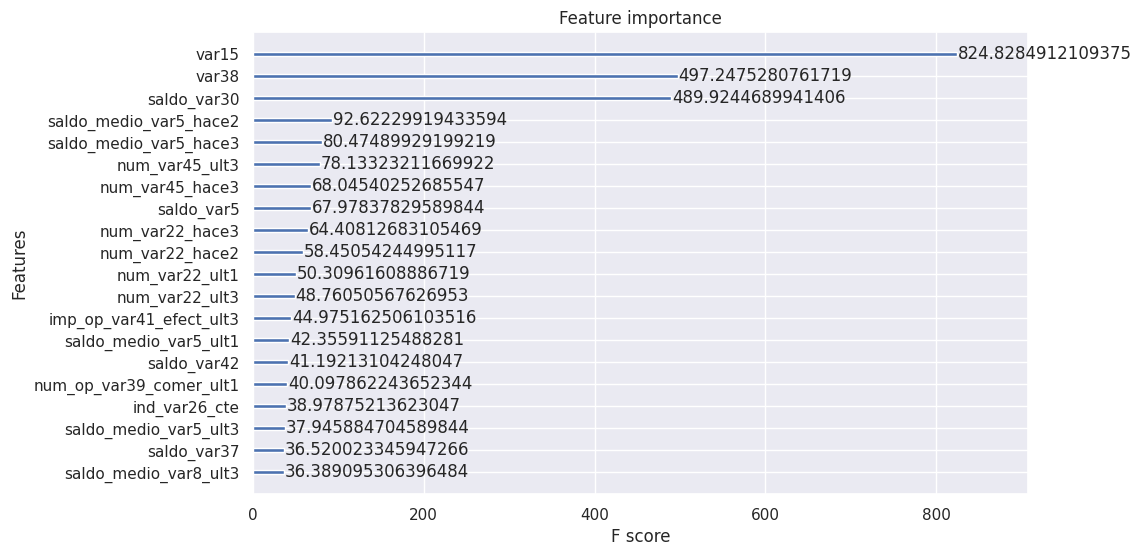

In [72]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [73]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
94,var15,824.828491,1
27,var38,497.247528,2
95,saldo_var30,489.924469,3
75,saldo_medio_var5_hace2,92.622299,4
39,saldo_medio_var5_hace3,80.474899,5
...,...,...,...
102,saldo_medio_var13_corto_ult3,0.248783,109
73,saldo_var24,0.213028,110
110,num_var32_0,0.147491,111
72,num_op_var41_comer_ult1,0.135735,112


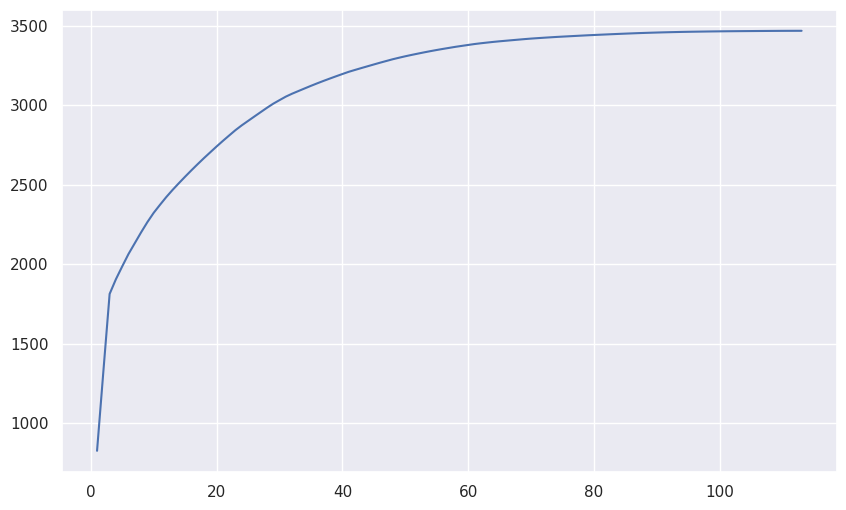

In [74]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

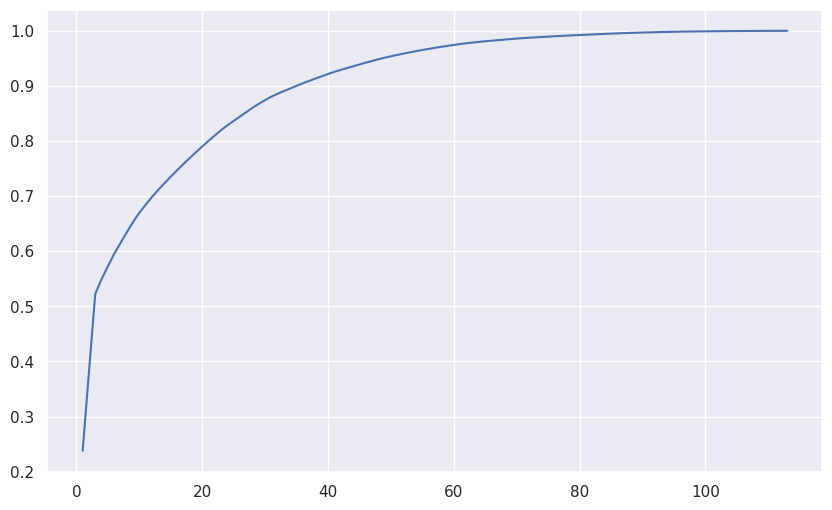

In [75]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [76]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [77]:
pdVarImp.loc[pdVarImp.porc_gain_acum <= 0.95]

,Feature,Importance,C,porc_gain,porc_gain_acum
94,var15,824.828491,1,0.237866,0.237866
27,var38,497.247528,2,0.143398,0.381264
95,saldo_var30,489.924469,3,0.141286,0.522550
75,saldo_medio_var5_hace2,92.622299,4,0.026711,0.549260
39,saldo_medio_var5_hace3,80.474899,5,0.023208,0.572468
10,num_var45_ult3,78.133232,6,0.022532,0.595000
8,num_var45_hace3,68.045403,7,0.019623,0.614623
14,saldo_var5,67.978378,8,0.019604,0.634227
2,num_var22_hace3,64.408127,9,0.018574,0.652801
11,num_var22_hace2,58.450542,10,0.016856,0.669658


In [78]:
pdVarImp.transpose()

,94,27,95,75,39,10,8,14,2,11,...,60,34,4,78,83,102,73,110,72,54
Feature,var15,var38,saldo_var30,saldo_medio_var5_hace2,saldo_medio_var5_hace3,num_var45_ult3,num_var45_hace3,saldo_var5,num_var22_hace3,num_var22_hace2,...,num_var30,imp_aport_var13_ult1,num_var31,num_op_var40_comer_ult3,num_var40_0,saldo_medio_var13_corto_ult3,saldo_var24,num_var32_0,num_op_var41_comer_ult1,num_var30_0
Importance,824.828491,497.247528,489.924469,92.622299,80.474899,78.133232,68.045403,67.978378,64.408127,58.450542,...,0.31605,0.294189,0.28337,0.26177,0.25947,0.248783,0.213028,0.147491,0.135735,0.031495
C,1,2,3,4,5,6,7,8,9,10,...,104,105,106,107,108,109,110,111,112,113
porc_gain,0.237866,0.143398,0.141286,0.026711,0.023208,0.022532,0.019623,0.019604,0.018574,0.016856,...,0.000091,0.000085,0.000082,0.000075,0.000075,0.000072,0.000061,0.000043,0.000039,0.000009
porc_gain_acum,0.237866,0.381264,0.52255,0.54926,0.572468,0.595,0.614623,0.634227,0.652801,0.669658,...,0.999459,0.999544,0.999626,0.999701,0.999776,0.999848,0.999909,0.999952,0.999991,1.0


In [79]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features]))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features]))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [80]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left') 
metricsRes       

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test,xgb_train,xgb_test
0,AUC,0.800894,0.799110,0.802901,0.800285,0.858622,0.821658,0.898664,0.844663
1,Gini,0.601789,0.598221,0.605801,0.600570,0.717244,0.643317,0.797329,0.689326
2,Accuracy,0.783309,0.788389,0.711862,0.712225,0.960631,0.960405,0.963036,0.960602
3,Precision,0.112491,0.115143,0.090774,0.090909,0.720000,0.444444,1.000000,0.600000
4,Recall,0.649573,0.650776,0.696581,0.697339,0.008547,0.004435,0.065928,0.009983
5,F1-score,0.191771,0.195667,0.160618,0.160849,0.016893,0.008782,0.123701,0.019640


#Grid Search

# Random Search

In [81]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [82]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [83]:
12*5*3*7*10*100

1260000

In [84]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [85]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10     

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0
[20:48:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86711	valid-auc:0.79690
[5]	train-auc:0.90762	valid-auc:0.80868
[9]	train-auc:0.91740	valid-auc:0.81281
****** Iteration : 1
[20:48:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83516	valid-auc:0.80824
[5]	train-auc:0.84996	valid-auc:0.81985
[9]	train-auc:0.85654	valid-auc:0.82411
****** Iteration : 2
[20:48:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86641	valid-auc:0.79627
[5]	train-auc:0.86957	valid-auc:0.80180
[9]	train-auc:0.87215	valid-auc:0.80402
****** Iteration : 3
[20:48:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83826	valid-auc:0.80690
[5]	train-auc:0.85073	valid-auc:0.81490
[9]	train-auc:0.85546	valid-auc:0.81982
****** Iteration : 4
[20:48:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83996	valid-auc:0.81317
[5]	train-auc:0.85926	valid-auc:0.82506
[9]	train-auc:0.86865	valid-auc:0.82607
****** Iteration : 5
[20:48:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85585	valid-auc:0.80644
[5]	train-auc:0.87677	valid-auc:0.82175
[9]	train-auc:0.88491	valid-auc:0.82276
****** Iteration : 6
[20:48:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85380	valid-auc:0.80693
[5]	train-auc:0.85878	valid-auc:0.81021
[9]	train-auc:0.86006	valid-auc:0.81119
****** Iteration : 7
[20:48:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84933	valid-auc:0.80873
[5]	train-auc:0.87017	valid-auc:0.82028
[9]	train-auc:0.87733	valid-auc:0.82303
****** Iteration : 8
[20:48:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82855	valid-auc:0.81579
****** Iteration : 9
[20:49:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81771	valid-auc:0.79567
[5]	train-auc:0.82441	valid-auc:0.80279
[9]	train-auc:0.82905	valid-auc:0.80718
****** Iteration : 10
[20:49:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86640	valid-auc:0.79728
[5]	train-auc:0.87204	valid-auc:0.80306
[9]	train-auc:0.87469	valid-auc:0.80461
****** Iteration : 11
[20:49:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86430	valid-auc:0.79852
[5]	train-auc:0.87154	valid-auc:0.80299
[9]	train-auc:0.87371	valid-auc:0.80543
****** Iteration : 12
[20:49:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85965	valid-auc:0.80965
[5]	train-auc:0.86208	valid-auc:0.81195
[9]	train-auc:0.86319	valid-auc:0.81284
****** Iteration : 13
[20:49:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 14
[20:49:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85473	valid-auc:0.80911
[5]	train-auc:0.88476	valid-auc:0.81856
[9]	train-auc:0.89854	valid-auc:0.82494
****** Iteration : 15
[20:49:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86305	valid-auc:0.80895
[5]	train-auc:0.90817	valid-auc:0.81656
[9]	train-auc:0.93345	valid-auc:0.81040
****** Iteration : 16
[20:49:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84925	valid-auc:0.80949
[5]	train-auc:0.87113	valid-auc:0.82178
[9]	train-auc:0.87746	valid-auc:0.82495
****** Iteration : 17
[20:49:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85854	valid-auc:0.80574
[5]	train-auc:0.86606	valid-auc:0.80804
[9]	train-auc:0.86854	valid-auc:0.80872
****** Iteration : 18
[20:50:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81641	valid-auc:0.79462
[5]	train-auc:0.84277	valid-auc:0.82128
[9]	train-auc:0.84950	valid-auc:0.82532
****** Iteration : 19
[20:50:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86509	valid-auc:0.80309
[5]	train-auc:0.87191	valid-auc:0.80800
[9]	train-auc:0.87863	valid-auc:0.81107
****** Iteration : 20


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[20:50:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85965	valid-auc:0.80965
[5]	train-auc:0.86208	valid-auc:0.81195
[9]	train-auc:0.86319	valid-auc:0.81284
****** Iteration : 21
[20:50:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86006	valid-auc:0.80417
[5]	train-auc:0.86676	valid-auc:0.80930
[9]	train-auc:0.87146	valid-auc:0.81182
****** Iteration : 22
[20:50:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86711	valid-auc:0.79690
[5]	train-auc:0.89597	valid-auc:0.81787
[9]	train-auc:0.90996	valid-auc:0.81618
****** Iteration : 23
[20:50:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84933	valid-auc:0.80873
[5]	train-auc:0.85301	valid-auc:0.81274
[9]	train-auc:0.85452	valid-auc:0.81395
****** Iteration : 24
[20:50:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83870	valid-auc:0.81357
[5]	train-auc:0.84263	valid-auc:0.81604
[9]	train-auc:0.84369	valid-auc:0.81649
****** Iteration : 25
[20:50:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84925	valid-auc:0.80949
[5]	train-auc:0.85303	valid-auc:0.81283
[9]	train-auc:0.85454	valid-auc:0.81399
****** Iteration : 26
[20:51:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86006	valid-auc:0.80417
[5]	train-auc:0.86328	valid-auc:0.80711
[9]	train-auc:0.86640	valid-auc:0.80912
****** Iteration : 27
[20:51:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83522	valid-auc:0.80876
[5]	train-auc:0.84218	valid-auc:0.81468
[9]	train-auc:0.84298	valid-auc:0.81520
****** Iteration : 28
[20:51:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86876	valid-auc:0.79570
[5]	train-auc:0.88587	valid-auc:0.81153
[9]	train-auc:0.89353	valid-auc:0.81597
****** Iteration : 29
[20:51:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82847	valid-auc:0.81592
****** Iteration : 30
[20:51:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81109
[5]	train-auc:0.85508	valid-auc:0.81908
[9]	train-auc:0.86186	valid-auc:0.82251
****** Iteration : 31
[20:51:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84197	valid-auc:0.80882
[5]	train-auc:0.84523	valid-auc:0.81406
[9]	train-auc:0.84719	valid-auc:0.81486
****** Iteration : 32
[20:51:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83172	valid-auc:0.80810
[5]	train-auc:0.83342	valid-auc:0.81104
[9]	train-auc:0.83335	valid-auc:0.81109
****** Iteration : 33
[20:51:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86352	valid-auc:0.79849
[5]	train-auc:0.89965	valid-auc:0.81689
[9]	train-auc:0.91067	valid-auc:0.81741
****** Iteration : 34
[20:51:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80826
[5]	train-auc:0.83389	valid-auc:0.81053
[9]	train-auc:0.83385	valid-auc:0.81065
****** Iteration : 35
[20:51:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85482	valid-auc:0.81129
[5]	train-auc:0.86024	valid-auc:0.81403
[9]	train-auc:0.86372	valid-auc:0.81478
****** Iteration : 36
[20:52:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84409	valid-auc:0.81084
[5]	train-auc:0.84856	valid-auc:0.81551
[9]	train-auc:0.85025	valid-auc:0.81605
****** Iteration : 37
[20:52:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84933	valid-auc:0.80873
[5]	train-auc:0.85480	valid-auc:0.81380
[9]	train-auc:0.85877	valid-auc:0.81461
****** Iteration : 38
[20:52:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86149	valid-auc:0.80619
[5]	train-auc:0.86413	valid-auc:0.80977
[9]	train-auc:0.86542	valid-auc:0.81026
****** Iteration : 39
[20:52:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82048	valid-auc:0.79846
[5]	train-auc:0.83054	valid-auc:0.80736
[9]	train-auc:0.83853	valid-auc:0.81583
****** Iteration : 40
[20:52:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79576
[5]	train-auc:0.83871	valid-auc:0.81860
[9]	train-auc:0.84253	valid-auc:0.82302
****** Iteration : 41
[20:52:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84382	valid-auc:0.80965
[5]	train-auc:0.86152	valid-auc:0.82083
[9]	train-auc:0.86723	valid-auc:0.82523
****** Iteration : 42
[20:52:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83996	valid-auc:0.81317
[5]	train-auc:0.85345	valid-auc:0.82160
[9]	train-auc:0.85870	valid-auc:0.82629
****** Iteration : 43
[20:52:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85380	valid-auc:0.80693
[5]	train-auc:0.86037	valid-auc:0.81124
[9]	train-auc:0.86414	valid-auc:0.81479
****** Iteration : 44
[20:52:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.87002	valid-auc:0.79485
[5]	train-auc:0.90898	valid-auc:0.81294
[9]	train-auc:0.92076	valid-auc:0.81149
****** Iteration : 45
[20:53:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85635	valid-auc:0.81124
[5]	train-auc:0.89994	valid-auc:0.81812
[9]	train-auc:0.92530	valid-auc:0.81846
****** Iteration : 46
[20:53:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82847	valid-auc:0.81592
****** Iteration : 47
[20:53:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86542	valid-auc:0.79744
[5]	train-auc:0.87972	valid-auc:0.81104
[9]	train-auc:0.88789	valid-auc:0.81810
****** Iteration : 48
[20:53:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84161	valid-auc:0.81093
[5]	train-auc:0.84531	valid-auc:0.81407
[9]	train-auc:0.84709	valid-auc:0.81466
****** Iteration : 49
[20:53:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82082	valid-auc:0.79844
[5]	train-auc:0.84323	valid-auc:0.82113
[9]	train-auc:0.84948	valid-auc:0.82560
****** Iteration : 50
[20:53:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85220	valid-auc:0.81277
[5]	train-auc:0.85851	valid-auc:0.81493
[9]	train-auc:0.86193	valid-auc:0.81546
****** Iteration : 51
[20:53:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82082	valid-auc:0.79844
[5]	train-auc:0.84323	valid-auc:0.82113
[9]	train-auc:0.84948	valid-auc:0.82560


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 52
[20:53:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85965	valid-auc:0.80965
[5]	train-auc:0.87413	valid-auc:0.81518
[9]	train-auc:0.88540	valid-auc:0.81704
****** Iteration : 53
[20:53:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86172	valid-auc:0.80226
[5]	train-auc:0.90096	valid-auc:0.81584
[9]	train-auc:0.91769	valid-auc:0.81802
****** Iteration : 54
[20:53:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.82213	valid-auc:0.80443
[9]	train-auc:0.82619	valid-auc:0.80870
****** Iteration : 55
[20:54:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85660	valid-auc:0.80803
[5]	train-auc:0.89580	valid-auc:0.81914
[9]	train-auc:0.90930	valid-auc:0.82270
****** Iteration : 56
[20:54:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84282	valid-auc:0.81078
[5]	train-auc:0.86783	valid-auc:0.82405
[9]	train-auc:0.87715	valid-auc:0.82659
****** Iteration : 57
[20:54:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85581	valid-auc:0.80622
[5]	train-auc:0.88644	valid-auc:0.82023
[9]	train-auc:0.89871	valid-auc:0.82094
****** Iteration : 58
[20:54:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85985	valid-auc:0.81038
[5]	train-auc:0.90916	valid-auc:0.81859
[9]	train-auc:0.93535	valid-auc:0.81713
****** Iteration : 59
[20:54:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80875
[5]	train-auc:0.84240	valid-auc:0.81666
[9]	train-auc:0.84547	valid-auc:0.82102
****** Iteration : 60
[20:54:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86682	valid-auc:0.79781
[5]	train-auc:0.88463	valid-auc:0.81141
[9]	train-auc:0.89274	valid-auc:0.81591
****** Iteration : 61
[20:54:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.82887	valid-auc:0.81130
[9]	train-auc:0.83462	valid-auc:0.81776
****** Iteration : 62
[20:54:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80643	valid-auc:0.78668
[5]	train-auc:0.80891	valid-auc:0.78950
[9]	train-auc:0.81254	valid-auc:0.79339
****** Iteration : 63
[20:54:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83179	valid-auc:0.80831
[5]	train-auc:0.85091	valid-auc:0.82135
[9]	train-auc:0.85767	valid-auc:0.82423
****** Iteration : 64
[20:54:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84197	valid-auc:0.80882
[5]	train-auc:0.85322	valid-auc:0.81748
[9]	train-auc:0.85966	valid-auc:0.82128
****** Iteration : 65
[20:55:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 66
[20:55:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86542	valid-auc:0.79744
[5]	train-auc:0.87186	valid-auc:0.80459
[9]	train-auc:0.87710	valid-auc:0.80764
****** Iteration : 67
[20:55:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83272	valid-auc:0.80804
[5]	train-auc:0.84472	valid-auc:0.81940
[9]	train-auc:0.85070	valid-auc:0.82364
****** Iteration : 68
[20:55:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83279	valid-auc:0.80787
[5]	train-auc:0.83473	valid-auc:0.81089
[9]	train-auc:0.83965	valid-auc:0.81527
****** Iteration : 69
[20:55:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77478	valid-auc:0.76484
[9]	train-auc:0.77478	valid-auc:0.76484
****** Iteration : 70
[20:55:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83522	valid-auc:0.80876
[5]	train-auc:0.84635	valid-auc:0.81749
[9]	train-auc:0.85175	valid-auc:0.82080
****** Iteration : 71
[20:55:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86006	valid-auc:0.80417
[5]	train-auc:0.89335	valid-auc:0.82002
[9]	train-auc:0.91235	valid-auc:0.82251
****** Iteration : 72
[20:55:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84666	valid-auc:0.81047
[5]	train-auc:0.85289	valid-auc:0.81454
[9]	train-auc:0.85640	valid-auc:0.81565
****** Iteration : 73
[20:55:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83176	valid-auc:0.80837
[5]	train-auc:0.83320	valid-auc:0.80994
[9]	train-auc:0.83748	valid-auc:0.81384
****** Iteration : 74
[20:55:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84409	valid-auc:0.81084
[5]	train-auc:0.85022	valid-auc:0.81636
[9]	train-auc:0.85388	valid-auc:0.81838
****** Iteration : 75
[20:55:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83996	valid-auc:0.81317
[5]	train-auc:0.85345	valid-auc:0.82160
[9]	train-auc:0.85870	valid-auc:0.82629
****** Iteration : 76
[20:55:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85368	valid-auc:0.80721
[5]	train-auc:0.85893	valid-auc:0.81050
[9]	train-auc:0.86033	valid-auc:0.81098
****** Iteration : 77
[20:56:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85482	valid-auc:0.81129
[5]	train-auc:0.86024	valid-auc:0.81403
[9]	train-auc:0.86372	valid-auc:0.81478
****** Iteration : 78
[20:56:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.81577	valid-auc:0.79641
[9]	train-auc:0.81825	valid-auc:0.80026
****** Iteration : 79
[20:56:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82847	valid-auc:0.81592
****** Iteration : 80
[20:56:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81777	valid-auc:0.79576
[5]	train-auc:0.82495	valid-auc:0.80262
[9]	train-auc:0.82928	valid-auc:0.80650
****** Iteration : 81
[20:56:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82040	valid-auc:0.79848
[5]	train-auc:0.84403	valid-auc:0.82071
[9]	train-auc:0.84977	valid-auc:0.82611
****** Iteration : 82
[20:56:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84269	valid-auc:0.81072
[5]	train-auc:0.86167	valid-auc:0.82265
[9]	train-auc:0.86750	valid-auc:0.82632
****** Iteration : 83
[20:56:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.83196	valid-auc:0.81673
[9]	train-auc:0.84012	valid-auc:0.82190
****** Iteration : 84
[20:56:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.81577	valid-auc:0.79641
[9]	train-auc:0.81825	valid-auc:0.80026
****** Iteration : 85
[20:56:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83172	valid-auc:0.80810
[5]	train-auc:0.83995	valid-auc:0.81643
[9]	train-auc:0.84503	valid-auc:0.81958
****** Iteration : 86
[20:56:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84542	valid-auc:0.81106
[5]	train-auc:0.85726	valid-auc:0.81708
[9]	train-auc:0.86507	valid-auc:0.81935
****** Iteration : 87
[20:56:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83272	valid-auc:0.80804
[5]	train-auc:0.84472	valid-auc:0.81940
[9]	train-auc:0.85070	valid-auc:0.82364
****** Iteration : 88
[20:56:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83185	valid-auc:0.80831
[5]	train-auc:0.83446	valid-auc:0.81055
[9]	train-auc:0.83441	valid-auc:0.81113
****** Iteration : 89
[20:56:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81925	valid-auc:0.80282
[9]	train-auc:0.82847	valid-auc:0.81592
****** Iteration : 90
[20:56:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84273	valid-auc:0.81109
[5]	train-auc:0.85000	valid-auc:0.81601
[9]	train-auc:0.85296	valid-auc:0.81775
****** Iteration : 91
[20:56:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86968	valid-auc:0.79444
[5]	train-auc:0.90757	valid-auc:0.81471
[9]	train-auc:0.92046	valid-auc:0.81733
****** Iteration : 92
[20:57:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.81635	valid-auc:0.79453
[5]	train-auc:0.83927	valid-auc:0.81832
[9]	train-auc:0.84311	valid-auc:0.82120
****** Iteration : 93
[20:57:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80662	valid-auc:0.78658
[5]	train-auc:0.81577	valid-auc:0.79641
[9]	train-auc:0.81825	valid-auc:0.80026
****** Iteration : 94
[20:57:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.77464	valid-auc:0.76449


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 95
[20:57:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.77464	valid-auc:0.76449
[5]	train-auc:0.78406	valid-auc:0.77659
[9]	train-auc:0.81792	valid-auc:0.80230
****** Iteration : 96
[20:57:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84448	valid-auc:0.81094
[5]	train-auc:0.84981	valid-auc:0.81370
[9]	train-auc:0.85487	valid-auc:0.81667
****** Iteration : 97
[20:57:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84542	valid-auc:0.81106
[5]	train-auc:0.85179	valid-auc:0.81426
[9]	train-auc:0.85552	valid-auc:0.81508
****** Iteration : 98
[20:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83267	valid-auc:0.80875
[5]	train-auc:0.83462	valid-auc:0.81154
[9]	train-auc:0.83966	valid-auc:0.81595
****** Iteration : 99
[20:57:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85473	valid-auc:0.80911
[5]	train-auc:0.87639	valid-auc:0.81861
[9]	train-auc:0.88636	valid-auc:0.82111


<ipython-input-85-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [86]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
504,56,objetive,binary_logistic,75.429840,65.318295
505,56,max_depth,7,75.429840,65.318295
506,56,learning_rate,0.2,75.429840,65.318295
507,56,seed,123,75.429840,65.318295
508,56,max_leaves,2,75.429840,65.318295
...,...,...,...,...,...
562,62,max_leaves,4,62.507152,58.678846
561,62,seed,123,62.507152,58.678846
560,62,learning_rate,0.01,62.507152,58.678846
558,62,objetive,binary_logistic,62.507152,58.678846


In [87]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
719,79,eval_metric,auc,65.694756,63.183764,2.510992
716,79,min_data_leaf,0.01,65.694756,63.183764,2.510992
717,79,grow_policy,lossguide,65.694756,63.183764,2.510992
718,79,min_child_weight,9,65.694756,63.183764,2.510992
809,89,eval_metric,auc,65.694756,63.183764,2.510992
...,...,...,...,...,...,...
139,15,max_leaves,8,86.689042,62.079798,24.609244
140,15,min_data_leaf,0.15,86.689042,62.079798,24.609244
141,15,grow_policy,lossguide,86.689042,62.079798,24.609244
142,15,min_child_weight,2,86.689042,62.079798,24.609244


In [88]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
396,44,objetive,binary_logistic,68.505322,64.604239,3.901083
365,40,min_data_leaf,0.01,68.505322,64.604239,3.901083
367,40,min_child_weight,3,68.505322,64.604239,3.901083
368,40,eval_metric,auc,68.505322,64.604239,3.901083
378,42,objetive,binary_logistic,68.505322,64.604239,3.901083
...,...,...,...,...,...,...
558,62,objetive,binary_logistic,62.507152,58.678846,3.828306
564,62,grow_policy,lossguide,62.507152,58.678846,3.828306
565,62,min_child_weight,3,62.507152,58.678846,3.828306
566,62,eval_metric,auc,62.507152,58.678846,3.828306


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


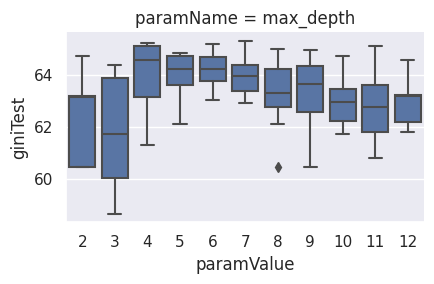

In [92]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


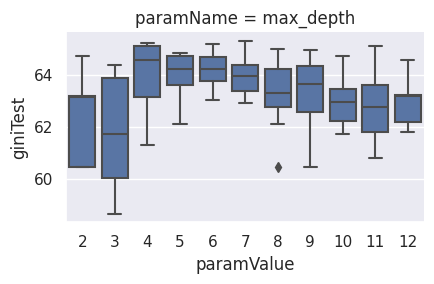

In [94]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [95]:
import pickle

In [96]:
xgBoost

In [97]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [100]:
loaded_model

In [99]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [101]:
loaded_model

In [105]:
loaded_model.predict(xgb.DMatrix(X_test[features][:1]))


array([0.07358625], dtype=float32)

---

# Gracias por completar este laboratorio!

---

